# MB Profiles 

In [1]:
%pylab inline
import os
import downglacier.sandbox.tcd_utils as utils
import downglacier.graphics as dgplot
import downglacier as dg
import seaborn as sns
import pandas as pd
from datetime import datetime as dt
import netCDF4
pal = sns.color_palette('pastel')
sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1.2)

Populating the interactive namespace from numpy and matplotlib


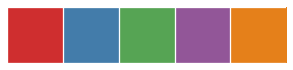

In [2]:
pal = sns.color_palette('Set1', n_colors=5, desat=0.8)
sns.palplot(pal)
sns.set_palette(pal)

In [3]:
wd = '/home/mowglie/DownGlacier_tcd_runs_rev0/run_standard_allz'
odir = os.path.join(wd, 'output')

### Data

In [4]:
dfd = pd.read_csv(os.path.join(odir, 'diagnostics', 'predict_ts.csv'), index_col=0, 
                  parse_dates= {"time" : [0]}).loc[dt(1979,10,1):dt(2013,9,1)]
dfi = pd.read_csv(os.path.join(odir, 'diagnostics', 'predict_info.csv'), index_col=0).T
# filter keys fir height
varkeys = dfd.columns

In [5]:
dfmb = dfd[dfd.columns[['mbtotfromsum_' in c for c in dfd.columns]]]
mb_allt = dfmb.mean() * 12 / 1000.
mb_calibt = dfmb.loc[dt(2005,10,1):dt(2009,9,1)].mean() * 12 / 1000.

In [6]:
alt = []
for i in dfmb.columns:
    i = i.split('_')
    alt.append(float(i[1]))
alt = np.array(alt)

In [7]:
f = os.path.join(dg.file_dir, 'tcd_paper', 'standard_run_predictands_shallap.nc')
nc = netCDF4.Dataset(f)
ref_mb = np.mean(nc.variables['totalmbnotacc'], axis=0) * 12 / 1000.

In [8]:
area = nc.variables['A_sc'][:]
area = area / np.sum(area) * 100.

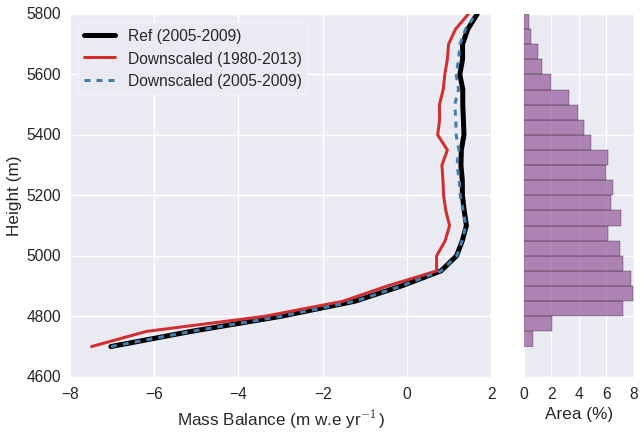

In [9]:
pos1 = [0.11, 0.12, 0.65, 0.84]
pos2 = [0.81, pos1[1], 0.17, pos1[3]]
fig = plt.figure(figsize=(9, 6))
ax1 = fig.add_axes(pos1)
ax1.plot(ref_mb, alt, label='Ref (2005-2009)', color='k', linewidth=5);
ax1.plot(mb_allt, alt, label='Downscaled (1980-2013)', linewidth=3);
ax1.plot(mb_calibt, alt, '--', label='Downscaled (2005-2009)', linewidth=3);
ax1.set_xlabel('Mass Balance (m w.e yr$^{-1}$)')
ax1.set_ylabel('Height (m)')
plt.legend(loc='best', frameon=True);
ax2 = fig.add_axes(pos2)
ax2.hist(alt, len(area)-1, weights=area, orientation='horizontal', alpha=0.7, color=pal[3]);
ax2.set_xlabel('Area (%)')
ax2.set_yticklabels('');
ax2.set_xticks(np.arange(5)*2)
plt.savefig(os.path.join(utils.get_plot_dir(), 'response_profiles.pdf'))

In [10]:
pok = np.where(mb_allt > 0.)
np.sum(area[pok])

74.21964493690264

In [11]:
np.sum(area[np.where((alt >= 4850) & (alt <=4950))])

22.999180907400103

In [12]:
odf = pd.DataFrame()
odf['Altitude'] = alt
odf['Area'] = nc.variables['A_sc'][:]

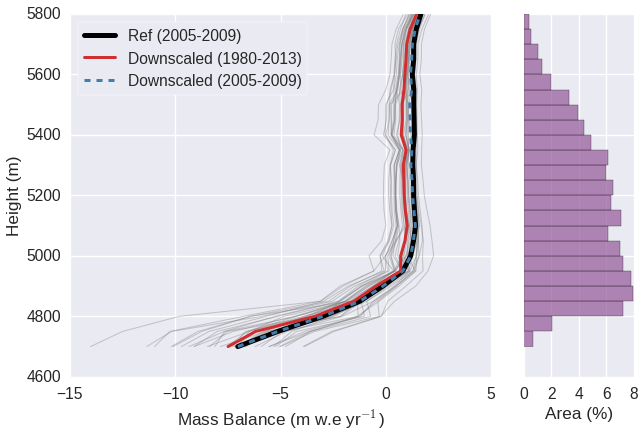

In [14]:
pos1 = [0.11, 0.12, 0.65, 0.84]
pos2 = [0.81, pos1[1], 0.17, pos1[3]]
fig = plt.figure(figsize=(9, 6))
ax1 = fig.add_axes(pos1)
ax1.plot(ref_mb, alt, label='Ref (2005-2009)', color='k', linewidth=5, zorder=3);
for i in np.arange(len(dfmb) / 12):
    i = int(i) * 12
    odf['{}'.format(dfmb.iloc[[i+11]].index.year[0])] = (dfmb.iloc[i:i+12].mean() * 12 / 1000.).values
    mb_yr = dfmb.iloc[i:i+12].mean() * 12 / 1000.
    ax1.plot(mb_yr, alt, color='gray', zorder=1, alpha=0.4, linewidth=1);

ax1.plot(mb_allt, alt, label='Downscaled (1980-2013)', linewidth=3, zorder=4);
ax1.plot(mb_calibt, alt, '--', label='Downscaled (2005-2009)', linewidth=3, zorder=5);
ax1.set_xlabel('Mass Balance (m w.e yr$^{-1}$)')
ax1.set_ylabel('Height (m)')
plt.legend(loc='best', frameon=True);
ax2 = fig.add_axes(pos2)
ax2.hist(alt, len(area)-1, weights=area, orientation='horizontal', alpha=0.7, color=pal[3]);
ax2.set_xlabel('Area (%)')
ax2.set_yticklabels('');
ax2.set_xticks(np.arange(5)*2);

In [25]:
odf = odf.set_index('Altitude')

In [29]:
odf.to_csv('/home/mowglie/mb_profiles_downscaled.csv', float_format='%.2f')